# Supervised Learning. Classification problem

Classification is a process of predicting a *qualitative response* (default probability, fraud probability, product category, etc.). This type of problems happen more often than Regression problems with *quantitative response* (sales, prices, volumes, etc.).

Here the output Y (target) is a *qualitative* (*categorical*) variable, rather than *quantitative*. It takes two or more values (*classes* or *categories*). 

In case of just *two classes*, the problem is known as a **binary classification**, $Y \in \{0,1\}$.

In case of *multiple classes*, the problem is known as **multi-class classification**, e.g., $Y \in \{0,1,2,3\}$

Features that are used as predictors can also be of categorical type.

There are two types of qualitative variables - nominal and ordinal. The difference is in order of variable values.

A nominal variable has no intrinsic ordering of the categories, e.g. gender or clothes colors.

An ordinal variable has clear ordering, e.g. economic status (low, medium, high) or education levels (elementary school, high school, college, bachelors, masters, PhD). We can arrange the classes in order: from lowest educational level to highest and assign corresponding numerical values. However we can't operate with these numbers as with numericals, because the distance between each two classes is not the same, e.g., the distance between elementary school and high school is not equal to the distance between bachelor and master degress.

String encoded features (e.g., 'male' and 'female' for gender) can't be used directly by ML algorithms. They need to be encoded into numerical values. This holds for both input and output variables.

### Pandas. Categorical data type

https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

<blockquote>
Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.
<br><br>
In contrast to statistical categorical variables, categorical data might have an order (e.g. ‘strongly agree’ vs ‘agree’ or ‘first observation’ vs. ‘second observation’), but numerical operations (additions, divisions, …) are not possible.
<br><br>
All values of categorical data are either in categories or np.nan. Order is defined by the order of categories, not lexical order of the values. Internally, the data structure consists of a categories array and an integer array of codes which point to the real value in the categories array.
<br><br>
The categorical data type is useful in the following cases:
<br><br>
A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory.
<br><br>
The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order.
<br><br>
As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).
</blockquote>


In [48]:
cd '/Users/mk/Documents/ml/data'

/Users/mk/Documents/ml/data


In [4]:
import pandas as pd
import numpy as np

Let's explore how to work with categorical data using Iowa house prices dataset.

In [312]:
df = pd.read_csv('./house_prices/train.csv')

In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Object dtype refers to categorical features. Some categories can be of type int like e.g. MSSubClass values.

In [314]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Integer encoding


Let's take one feature with dtype object and transform into pandas nominal categorical variable.

In [315]:
df['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [316]:
df['Street_cat'] = df['Street'].astype('category')

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          91 non-null     object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

In [318]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_cat
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,Pave
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,Pave
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,Pave
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,Pave
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,Pave


In [319]:
df['Street_cat_codes'] = df['Street_cat'].cat.codes

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 83 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Id                1460 non-null   int64   
 1   MSSubClass        1460 non-null   int64   
 2   MSZoning          1460 non-null   object  
 3   LotFrontage       1201 non-null   float64 
 4   LotArea           1460 non-null   int64   
 5   Street            1460 non-null   object  
 6   Alley             91 non-null     object  
 7   LotShape          1460 non-null   object  
 8   LandContour       1460 non-null   object  
 9   Utilities         1460 non-null   object  
 10  LotConfig         1460 non-null   object  
 11  LandSlope         1460 non-null   object  
 12  Neighborhood      1460 non-null   object  
 13  Condition1        1460 non-null   object  
 14  Condition2        1460 non-null   object  
 15  BldgType          1460 non-null   object  
 16  HouseStyle        1460 n

In [321]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Street_cat,Street_cat_codes
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,2,2008,WD,Normal,208500,Pave,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,0,5,2007,WD,Normal,181500,Pave,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,9,2008,WD,Normal,223500,Pave,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,2,2006,WD,Abnorml,140000,Pave,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,0,12,2008,WD,Normal,250000,Pave,1


In [322]:
df['Street_cat_codes'].value_counts() #gravel has taken zero value due to alphabetical order of classes

1    1454
0       6
Name: Street_cat_codes, dtype: int64

The same conversion to the nominal variable can be applied to multilevel variable.

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [323]:
df['BsmtCond_cat'] = df['BsmtCond'].astype('category').cat.codes
print("Original values:\n{}\n\nEncoded values:\n{}".format(df['BsmtCond'].value_counts(dropna=False),df['BsmtCond_cat'].value_counts()))

Original values:
TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

Encoded values:
 3    1311
 1      65
 0      45
-1      37
 2       2
Name: BsmtCond_cat, dtype: int64


By default missing values are encoded as -1 value.

### Ordinal variables

We can control order of the categories in a variable. The order matters for naturally ordered classes, e.g., kitchen quality.

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [324]:
df['KitchenQual_nom'] = df['KitchenQual'].astype('category').cat.codes

In [325]:
df['KitchenQual'].value_counts(dropna=False)

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [326]:
df['KitchenQual_nom'].value_counts()

3    735
2    586
0    100
1     39
Name: KitchenQual_nom, dtype: int64

The order is now meaningless: Excellent, Fair, Good, Typical. We can introduce the desired order of the feature.

In [327]:
from sklearn.preprocessing import OrdinalEncoder
oenc=OrdinalEncoder(categories=[['Fa','TA','Gd','Ex']])

df['KitchenQual_ord'] = oenc.fit_transform(df['KitchenQual'][:,np.newaxis])

In [328]:
df['KitchenQual_ord'].value_counts()

1.0    735
2.0    586
3.0    100
0.0     39
Name: KitchenQual_ord, dtype: int64

### One-hot encoding

Sometimes we need to transform our categorical variable into the set of dummy variables for each distinct class of the variable. This transformation is often used when there is no natural order in categorical variable and numeric distance between encoded categories can be misleading for the algorithm.

In [329]:
pd.get_dummies(df['SaleCondition'])

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,1,0,0,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
1455,0,0,0,0,1,0
1456,0,0,0,0,1,0
1457,0,0,0,0,1,0
1458,0,0,0,0,1,0


Alternatively, the same set of dummy variables can be created using OneHotEncoder from sklearn.

In [330]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
X = enc.fit_transform(df['SaleCondition'][:,np.newaxis])

In [331]:
X

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [332]:
#get list of categories for OneHotEncoder
enc.fit(df['SaleCondition'][:,np.newaxis]).categories_

[array(['Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'],
       dtype=object)]

#### The rules of thumb

Feed algorithms with nominal categorical features **encoded as integers**, e.g. gender, OR group multi-class categories into binary classes for small datasets.

Feed algorithms with **one-hot encoded** variables for nominal multiclass features if sample size allows.

Feed algorithm with **ordinal** variables for features with native ordering.

### Plotting categorical features

In [333]:
df['BsmtCond'].astype('category').cat.categories

Index(['Fa', 'Gd', 'Po', 'TA'], dtype='object')

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [335]:
#let's change categories names for convenience
df['BsmtCond'] = df['BsmtCond'].astype('category').cat.rename_categories({'Fa': 'Fair', 'Gd': 'Good', 'Po': 'Poor', 'TA': 'Typical'})

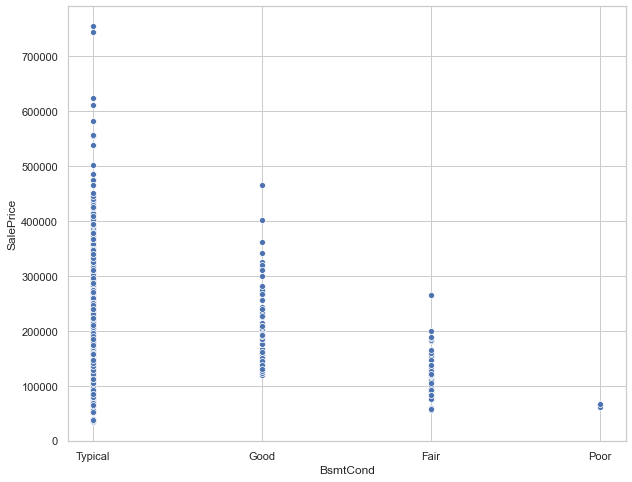

In [336]:
#basic scatter plot in seaborn plots categorical variables, but suffers from points fall in the same position along x-axis
sns.scatterplot(x='BsmtCond',y='SalePrice',data=df)

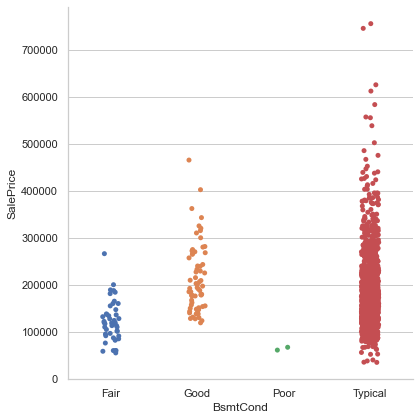

In [337]:
#catplot allows to plot categories with jitter parameter adjusting point position along x-axis 
sns.catplot(x='BsmtCond',y='SalePrice',data=df, height=6)

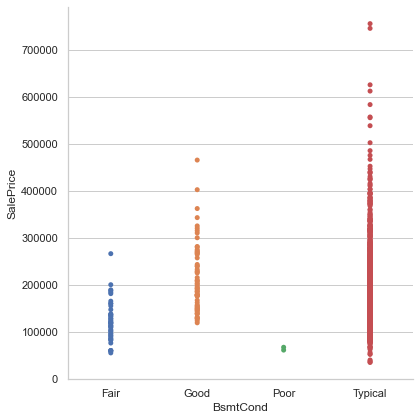

In [338]:
#compared to no jitter
sns.catplot(x='BsmtCond',y='SalePrice',data=df, jitter=False, height=6)

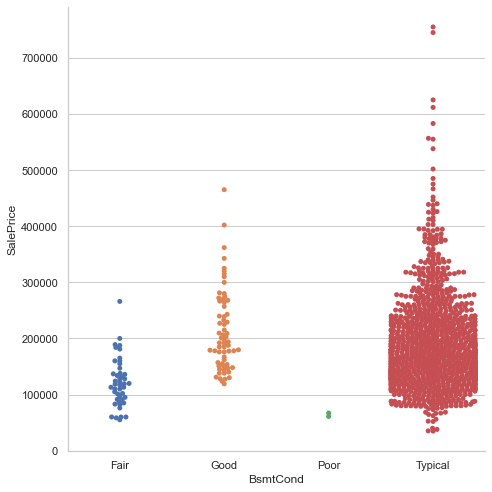

In [339]:
#alternatively we may specify kind="swarm" to control points such that they do not overlap
sns.catplot(x='BsmtCond',y='SalePrice',data=df, kind="swarm", height = 7)

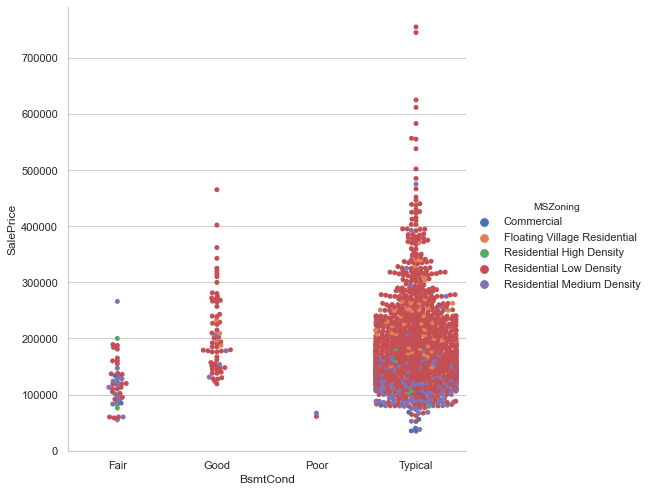

In [340]:
#we can indicate points with colors for other categorical feature
#e.g. MSZoning: Identifies the general zoning classification of the sale.
df['MSZoning'] = df['MSZoning'].astype('category').cat.rename_categories({'RL': 'Residential Low Density', 'RM': 'Residential Medium Density', 'C (all)': 'Commercial', 'FV': 'Floating Village Residential', 'RH': 'Residential High Density'})
sns.catplot(x='BsmtCond',y='SalePrice',data=df, kind="swarm", hue='MSZoning',height=7)

We can union categories into larger groups to derive more meaningful and easy to read charts.

In [341]:
mp = {'Fair':'Fair & Poor','Poor':'Fair & Poor','Good':'Typical & Good','Typical':'Typical & Good'}
df['BsmtCond_dich'] = df['BsmtCond'].map(mp)
df['BsmtCond_dich'].value_counts()

Typical & Good    1376
Fair & Poor         47
Name: BsmtCond_dich, dtype: int64

In [342]:
mp = {'Commercial':'Commercial','Floating Village Residential':'Residential Other',
      'Residential High Density':'Residential High','Residential Low Density':'Residential Other',
     'Residential Medium Density':'Residential High'}
df['MSZoning_dich'] = df['MSZoning'].map(mp)
df['MSZoning_dich'].value_counts()

Residential Other    1216
Residential High      234
Commercial             10
Name: MSZoning_dich, dtype: int64

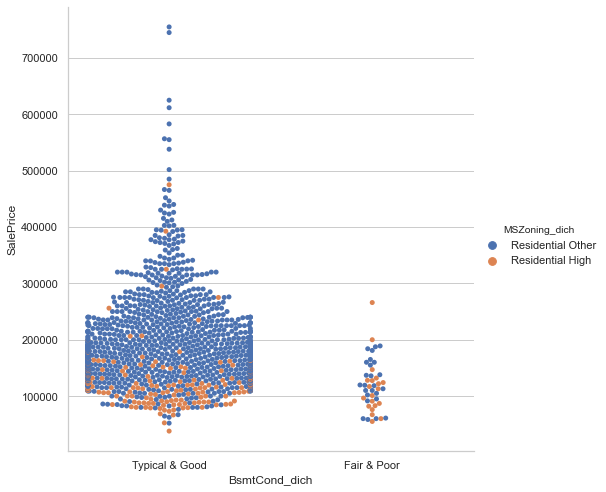

In [343]:
sns.catplot(x='BsmtCond_dich',y='SalePrice',data=df.query("MSZoning_dich != 'Commercial'"), kind="swarm", hue='MSZoning_dich',height=7)

### Binning the data

We can transform numerical variable into categorical bins using cut() functionality.

In [344]:
pd.unique(df['YearBuilt'])

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905])

In [345]:
df['house_age'] = 2020 - df['YearBuilt']
df['house_age'].describe()

count    1460.000000
mean       48.732192
std        30.202904
min        10.000000
25%        20.000000
50%        47.000000
75%        66.000000
max       148.000000
Name: house_age, dtype: float64

In [350]:
df['house_age_gr'] = pd.cut(df['house_age'], bins=[10,25,50,100,150], labels=['10-25','26-50','51-100','101-150'])
df[['house_age','house_age_gr']].head(10)

,house_age,house_age_gr
0,17,10-25
1,44,26-50
2,19,10-25
3,105,101-150
4,20,10-25
5,27,26-50
6,16,10-25
7,47,26-50
8,89,51-100
9,81,51-100


In [351]:
df['house_age_gr'].value_counts()

51-100     572
10-25      484
26-50      315
101-150     88
Name: house_age_gr, dtype: int64

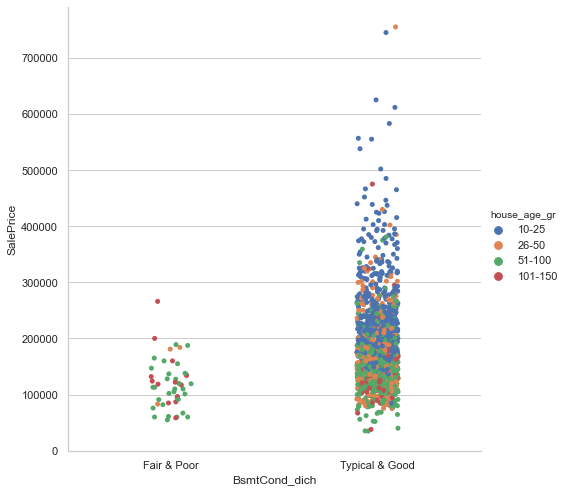

In [352]:
sns.catplot(x='BsmtCond_dich',y='SalePrice',data=df, hue='house_age_gr',height=7,
            order=['Fair & Poor','Typical & Good'])

More options for plotting categorical data can be found on official seaborn website.

https://seaborn.pydata.org/tutorial/categorical.html

### Pivot tables

Pivot tables is pandas functionality to create nested descriptive tables for categorical and numeric features.

In [355]:
df.pivot_table('SalePrice', index='BsmtCond_dich', columns='house_age_gr',aggfunc='mean').round(2)

house_age_gr,10-25,26-50,51-100,101-150
BsmtCond_dich,,,,
Fair & Poor,NaN,149333.33,110838.33,131162.79
Typical & Good,239888.14,176317.75,144392.36,141636.19


Multi-levels are allowed both for columns and indices.

In [361]:
df.pivot_table('SalePrice', index=['BsmtCond_dich', 'GarageCars'],
               columns=['MSZoning_dich','house_age_gr'],aggfunc=np.nanmean).round(2)

MSZoning_dich             Commercial           Residential High             \
house_age_gr                  51-100   101-150            10-25      26-50   
BsmtCond_dich  GarageCars                                                    
Fair & Poor    0                 NaN   85000.0              NaN        NaN   
               1                 NaN       NaN              NaN   83000.00   
               2                 NaN  133900.0              NaN        NaN   
               3                 NaN       NaN              NaN        NaN   
               4                 NaN       NaN              NaN        NaN   
Typical & Good 0            34900.00       NaN              NaN   86916.67   
               1            61103.67  102776.0        133000.00   98720.00   
               2            62196.50       NaN        167204.83  131533.33   
               3            81000.00       NaN              NaN        NaN   
               4                 NaN       NaN        206300.00        NaN   

MSZoning_dich                                   Residential Other             \
house_age_gr                  51-100    101-150             10-25      26-50   
BsmtCond_dich  GarageCars                                                      
Fair & Poor    0            57500.00  139500.00               NaN        NaN   
               1           104071.43  120500.00               NaN        NaN   
               2           102000.00  132000.00               NaN  182500.00   
               3                 NaN   87000.00               NaN        NaN   
               4                 NaN  265979.00               NaN        NaN   
Typical & Good 0            89488.89  114557.14         124166.67  125508.33   
               1           117044.02  119921.71         144000.00  130535.19   
               2           130324.19  146286.67         208019.88  187265.96   
               3           145000.00  255475.00         321142.04  303612.50   
               4                 NaN        NaN               NaN  123000.00   

MSZoning_dich                                    
house_age_gr                  51-100    101-150  
BsmtCond_dich  GarageCars                        
Fair & Poor    0            61000.00  135900.00  
               1           115020.83   88500.00  
               2           139400.00  160000.00  
               3                 NaN        NaN  
               4                 NaN        NaN  
Typical & Good 0           107934.09   96733.33  
               1           138513.98  136904.77  
               2           171937.45  169550.00  
               3           200425.00  161333.33  
               4           184000.00        NaN

## Binary classification

We continue to work with the built in datasets in sklearn. For binary classification problem we use breast cancer dataset.

Let's load the data and assign the positive class to be a malignant tumor.

In [7]:
from sklearn.datasets import load_breast_cancer

#load data
cancer = load_breast_cancer()
#create dataframes from np arrays of cancer Bunch objects
y = pd.DataFrame(cancer.target,columns=['target'])
X = pd.DataFrame(cancer.data,columns=cancer.feature_names)
#concatenate dataframes along columns
df = pd.concat([X,y],axis=1)
#change malignant cancer being the positive class
df['target'].replace([0,1],[1,0],inplace=True)
df['target'].value_counts() #check replacement

0    357
1    212
Name: target, dtype: int64

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [364]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


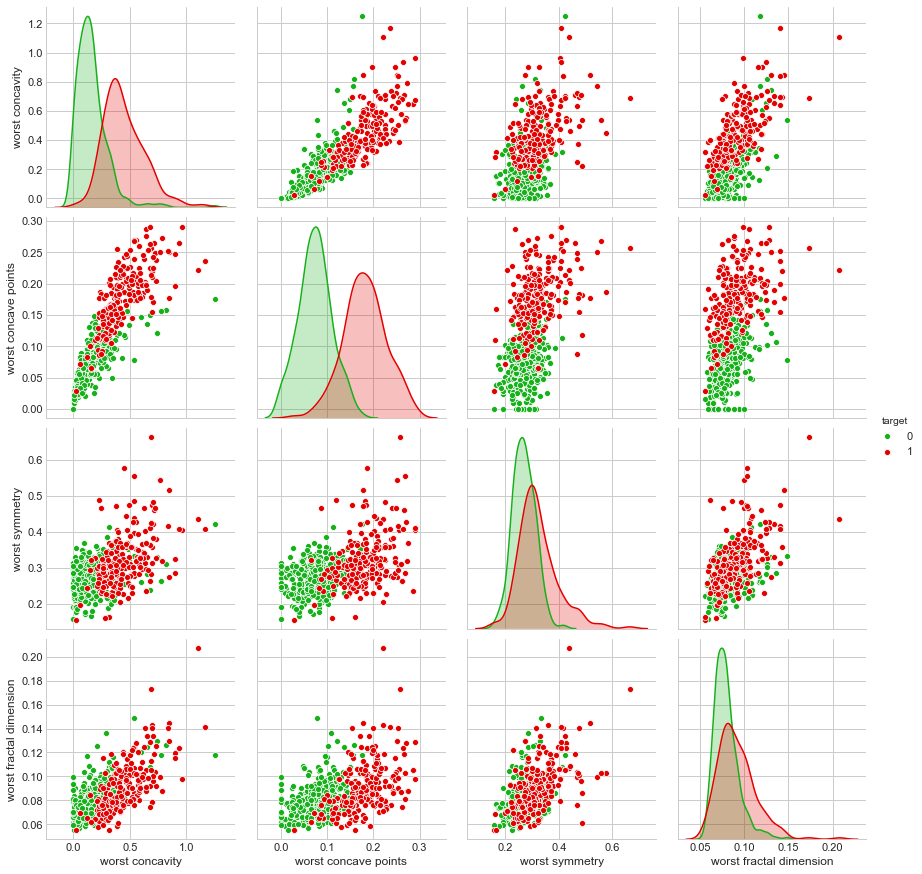

In [365]:
sns.pairplot(df.loc[:,'worst concavity':'target'],hue="target",palette=sns.xkcd_palette(['green','red']), height=3)

### Logistic Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

Logistic Regression is implemented in sklearn linear_model module. By default it uses L2 regularization.

Regularization is regulated by parameter C (inverse of regularization strength):

- higher values -> less regularization
- lower values -> more regularization -> coefficients tend to zero

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() #default solver 'lbfgs', L2 penalty, C=1

In [9]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler() #zero-mean, unit variance normalization     
X_scaled = std_scaler.fit_transform(X)

In [10]:
#flatten the target vector for cv
y = y.values.ravel()
clf.fit(X_scaled,y) #fit the Logistic Model on our dataset
clf.score(X_scaled,y) #accurcy score for training dataset

0.9876977152899824

In [11]:
from sklearn.model_selection import cross_val_score
sc = cross_val_score(clf, X_scaled, y, cv=5) #default stratified 5-fold cross-validation
print("Mean cv accuracy score (logit, L2, C=1): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (logit, L2, C=1): 0.9807


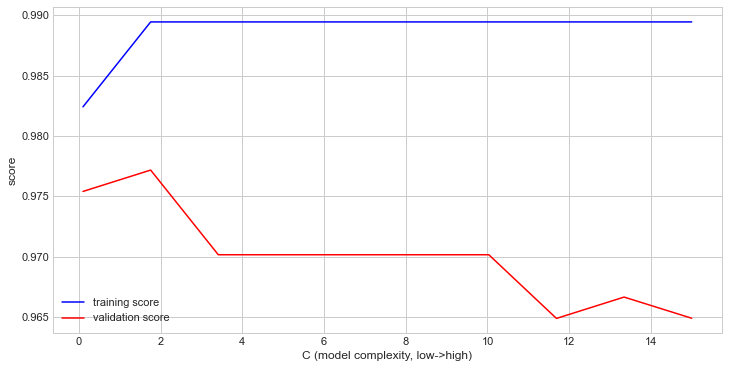

In [373]:
from sklearn.model_selection import validation_curve
c_vals = np.linspace(0.1,15,10) #regularization parameter values
train_scores, valid_scores = validation_curve(clf, X_scaled, y,"C",c_vals,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=[12,6])
plt.plot(c_vals, train_scores_mean, color='blue', label='training score')
plt.plot(c_vals, valid_scores_mean, color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('C (model complexity, low->high)')
plt.ylabel('score');

In [374]:
clf = LogisticRegression(C=1.8)
clf.fit(X_scaled,y) #fit the Logistic Model on our dataset
clf.score(X_scaled,y) #accurcy score for training dataset

0.9876977152899824

In [375]:
sc = cross_val_score(clf, X_scaled, y, cv=5) #default stratified 5-fold cross-validation
print("Mean cv accuracy score (logit, L2, C=1.8): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (logit, L2, C=1.8): 0.9772


### k-Nearest Neighbors

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

**k-Nearest Neighbors (k-NN)** algorithm is the supervised learning algorithm from the family of *instance-based algorithms*. Instance-based algorithms don't provide generalization, instead they perform predictions by comparing new data points with points in training dataset stored in memory.

k-NN can be applied for both Regression and Classification problems. In the former case, predicted outcome is the average of the nearby points. In the latter case, predicted outcome is the class of the majority of nearby points.

'Nearby points' are defined by the distance metric. Euclidean distance between points is the most popular distance metric. The number of nearby points to take into account for making predictions is defined with $k$ parameter.

To avoid model overfitting it is recommended to increase k neighbors for both Regression and Classification problems.

Feature scaling is also a necessary step to perform before application of k-NN algorithm.

**Pros**

- fast to train the model, there is no need to estimate parameters;
- known to be one of the simplest ML algorithms to start with.

**Cons**

- takes longer time to make predictions (need to handle all points), in comparison to parametric methods, e.g. linear regression model;
- lack of interpretability, because there is no statistic to measure the effect of features on outcome variable.


Initiate k-NN classifier with k neighbors equal to 3.

In [376]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

Use scaled features.

Load cross-validation routine to check model performance.

In [377]:
sc = cross_val_score(clf, X_scaled, y, cv=5) #For integer/None inputs, if the estimator is a classifier and y is either binary or multiclass, StratifiedKFold is used. In all other cases, KFold is used.
print("Mean cv accuracy score (kNN, 3): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (kNN, 3): 0.96


There is a direct relation between number of neighbors (model complexity) and model accuracy. Small number of neighbors will result in complex model which is subject to overfitting, whereas too many neighbors (simple model) will result in model underfitting.

We can explore this relation using validation curves.

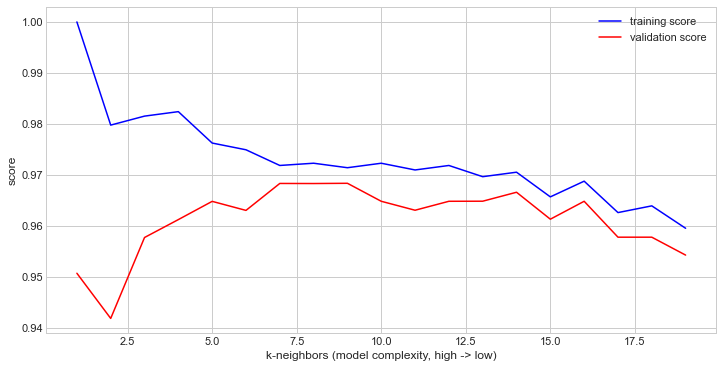

In [379]:
k_vals = np.arange(1,20) #number of neighbors parameter values range
train_scores, valid_scores = validation_curve(clf, X_scaled, y,"n_neighbors",k_vals,cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

plt.figure(figsize=[12,6])
plt.plot(k_vals, train_scores_mean, color='blue', label='training score')
plt.plot(k_vals, valid_scores_mean, color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('k-neighbors (model complexity, high -> low)')
plt.ylabel('score');

As expected, we observe high variance for small number of neighbors and high bias for large number of neighbors. The optimal choice of $k$ is about 8 neighbors.

### Naive Bayes

https://scikit-learn.org/stable/modules/naive_bayes.html

Naive Bayes models can be trained faster than Linear Models. The boost in efficiency is caused by the fact that model learns parameters by looking at each feature individually and collect simple per-class statistics from each feature. Once calculated, the probability model can be used to make predictions for new data using Bayes theorem.

The algorithm applies Bayes theorem with naive assumption of conditional independence between every pair of features given the value of the class variable. 

Bayes theorem:

$P(class|data) = \frac{P(data|class)P(class)}{P(data)}$


The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(class|data)$:

- GaussianNB (can be applied to continious data);
- BernoulliNB (can be applied to binary data);
- MultinomialNB (usually assumes count data or fractional counts).


Naive Bayes assumption of feature independence given class value is a strong assumption and unrealistic for real data, nevertheless, the technique is very effective for a large range of complex problems.

We apply GaussianNB for breast cancer dataset since all our features are continious. Other possibility is to discretize our continious values (create bins based on quantiles or percentiles) and fit the model with MultinomialNB.

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X,y)
gnb.score(X,y)

0.9420035149384886

In [13]:
sc = cross_val_score(gnb, X, y, cv=5)
print("Mean cv accuracy score (GaussianNB): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (GaussianNB): 0.9385


Alternative solution for MultinomialNB with binning the data into quintiles (q=5).

In [14]:
#quantile binning for one feature
pd.qcut(df['mean radius'], 5, labels=list(range(5)))

0      4
1      4
2      4
3      1
4      4
      ..
564    4
565    4
566    3
567    4
568    0
Name: mean radius, Length: 569, dtype: category
Categories (5, int64): [0 < 1 < 2 < 3 < 4]

In [15]:
#apply for all features
df_q = pd.DataFrame()
for col in df.loc[:,'mean radius':'worst fractal dimension']:
    df_q[col] = pd.qcut(df[col], 5, labels=list(range(5)))

In [17]:
df_q=pd.concat([df.target,df_q],axis=1)
df_q.head()

,target,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,4,0,4,4,4,4,4,4,4,...,4,0,4,4,4,4,4,4,4,4
1,1,4,1,4,4,1,1,3,3,2,...,4,1,4,4,1,2,2,4,2,3
2,1,4,3,4,4,4,4,4,4,4,...,4,2,4,4,3,4,4,4,4,3
3,1,1,3,1,0,4,4,4,4,4,...,2,2,2,1,4,4,4,4,4,4
4,1,4,0,4,4,3,3,4,4,2,...,4,0,4,4,2,2,3,3,0,1


In [18]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(X,y)
gnb.score(X,y)

0.8963093145869947

In [19]:
sc = cross_val_score(gnb, X, y, cv=5)
print("Mean cv accuracy score (MultinomialNB): {:.4f}".format(np.mean(sc)))

Mean cv accuracy score (MultinomialNB): 0.8963


MultinomialNB is less accurate than GaussianNB since we made artificial multinomial features. MultinomialNB more often used for text anaysis, e.g. count number of word occurences.

## Mullti-class classification

Many linear classification models are for binary classification only, and don’t extend naturally to the multiclass case (with the exception of logistic regression). A common technique to extend a binary classification algorithm to a multiclass classification algorithm is the **one-vs.-rest approach**.

In the **one-vs.-rest approach**, a binary model is learned for each class that tries to separate that class from all of the other classes, resulting in as many binary models as there are classes. To make a prediction, all binary classifiers are run on a test point. The classifier that has the highest score on its single class “wins,” and this class label is returned as the prediction.

In [21]:
#load multi-class Iris plants classification dataset
from sklearn.datasets import load_iris
md = load_iris()
print(md.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### One-vs.-rest approach

We use Logistic Regression to fit using one-vs.-rest approach.

In [25]:
clf = LogisticRegression(multi_class='ovr',solver='liblinear').fit(md.data,md.target) #force binary classifier
clf.coef_.shape

(3, 4)

Each row contains the coef vector for one of the three classes and in each column contains the coef value for specific predictor.

In [27]:
sc = cross_val_score(clf, md.data, md.target, cv=5)
print("Mean cv accuracy score (one-vs.-rest, LogisticRegression): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (one-vs.-rest, LogisticRegression): 0.96


### Multinomial Logit

Logistic Regression allows to handle multi-class classification problems as opposite to one-vs.-rest approach.

In [32]:
clf = LogisticRegression(multi_class='multinomial',solver='newton-cg').fit(md.data,md.target)
clf.coef_.shape

(3, 4)

In [33]:
sc = cross_val_score(clf, md.data, md.target, cv=5)
print("Mean cv accuracy score (Multinomial LogisticRegression): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (Multinomial LogisticRegression): 0.97


https://scikit-learn.org/stable/auto_examples/linear_model/plot_logistic_multinomial.html

### k-Nearest Neighbors

kNN for multi-class problem simply computes the majority class for the number of nearby points for each class of the target variable.

In [46]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(md.data,md.target)
kn.score(md.data,md.target)

0.96

In [48]:
kn.classes_

array([0, 1, 2])

In [47]:
sc = cross_val_score(clf, md.data, md.target, cv=5)
print("Mean cv accuracy score (kNN=3,multi-class): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (kNN=3,multi-class): 0.97


### Naive Bayes

One-vs.-rest classification is implemented via OneVsRestClassifier class of multiclass module. We can use it to fit the Naive Bayes model for multi-class problem.

In [40]:
from sklearn.multiclass import OneVsRestClassifier
nb = OneVsRestClassifier(GaussianNB())
nb.fit(md.data,md.target)
nb.score(md.data,md.target)

0.94

In [41]:
nb.classes_,nb.estimators_

(array([0, 1, 2]),
 [GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09),
  GaussianNB(priors=None, var_smoothing=1e-09)])

In [38]:
sc = cross_val_score(nb, md.data, md.target, cv=5)
print("Mean cv accuracy score (GaussianNB,multi-class): {:.2f}".format(np.mean(sc)))

Mean cv accuracy score (GaussianNB,multi-class): 0.94


### Sum up

**Linear Models** are interpretable, easy to scale, perform well with sparse data (large number of zeros), good choice if the number of features is larger than number of samples. But for small datasets with lower-dimensional spaces, other models provide better generalization performance.

**Instance based models** are easy to train and fast to apply, but there is a trade-off for interpretability, scalability and generalization performance.

**Bayesian model** may perform surprisingly well and fast given the unrealistic assumptions it requires.

### Grid Search & Model Selection

Grid Search with cross-validation is used to train the model and tune model parameters on validation sets. Model is evaluated based on default scoring or advanced scroring metrics. Model performance is checked against test set.

Let's see the core routine with Grid Search and Model Selection for Kaggle's dataset on Customer Churning.

https://www.kaggle.com/blastchar/telco-customer-churn#WA_Fn-UseC_-Telco-Customer-Churn.csv

In [138]:
cd '/Users/mk/Documents/ml/data/'

/Users/mk/Documents/ml/data


In [139]:
cc = pd.read_csv('ClientChurn.csv')

In [101]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [104]:
for col in cc.columns:
    if(cc[col].dtype == 'object'):
        cc[col]= cc[col].astype('category') #transform object data type to categorical
        cc[col] = cc[col].cat.codes #assign numeric codes for each category within column

In [106]:
cc.Churn.value_counts() #imbalanced dataset

0    5174
1    1869
Name: Churn, dtype: int64

In [116]:
from sklearn.model_selection import GridSearchCV, train_test_split
#conceal test set (30% of sample) in advance to check model performance
X_train, X_test, y_train, y_test = train_test_split(cc.iloc[:,1:19], cc.Churn, test_size=0.3, random_state=42)

#we'll train  Logistic Regression with various solvers and regularization parameters
param_grid = [{'solver': ['liblinear'],'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'penalty': ['l1','l2']}]

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=False)


grid.fit(X_train, y_train);
print("Parameter grid:\n{}\nBest parameters:\n{}".format(param_grid,grid.best_params_))

Parameter grid:
[{'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}]
Best parameters:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [117]:
print("Best cross-validation accuracy score: {:.2f}\nTest set accuracy score: {:.2f}".format(grid.best_score_,grid.score(X_test, y_test)))

Best cross-validation accuracy score: 0.80
Test set accuracy score: 0.81


In [118]:
results_acc = pd.DataFrame(grid.cv_results_)
results_acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009054,0.001017,0.001508,0.000274,0.001,l1,liblinear,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.774848,0.754564,0.753550,0.777890,0.752535,0.762677,0.011239,12
1,0.009517,0.000338,0.001183,0.000105,0.001,l2,liblinear,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.807302,0.782961,0.775862,0.786004,0.784990,0.787424,0.010552,11
2,0.009445,0.000391,0.001119,0.000043,0.01,l1,liblinear,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.807302,0.790061,0.781947,0.780933,0.788032,0.789655,0.009484,10
3,0.012138,0.000109,0.001093,0.000005,0.01,l2,liblinear,"{'C': 0.01, 'penalty': 'l2', 'solver': 'liblin...",0.806288,0.803245,0.782961,0.790061,0.801217,0.796755,0.008809,9
4,0.023118,0.001060,0.001256,0.000103,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.802231,0.809331,0.784990,0.795132,0.798174,0.797972,0.008047,8
5,0.014010,0.000710,0.001094,0.000009,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.805274,0.804260,0.786004,0.793103,0.802231,0.798174,0.007453,7
6,0.025886,0.001169,0.001103,0.000012,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.807302,0.806288,0.786004,0.793103,0.802231,0.798986,0.008199,5
7,0.014595,0.000870,0.001125,0.000045,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.805274,0.806288,0.784990,0.795132,0.801217,0.798580,0.007845,6
8,0.026708,0.000651,0.001221,0.000062,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.806288,0.806288,0.786004,0.795132,0.804260,0.799594,0.007950,4
9,0.015796,0.001502,0.001287,0.000145,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.807302,0.806288,0.786004,0.795132,0.804260,0.799797,0.008129,1


In [127]:
scores = np.array(results_acc.mean_test_score).reshape(2,6).T
scores = pd.DataFrame(scores,
                     index=[0.001, 0.01, 0.1, 1, 10, 100],
                     columns=['l1','l2'])

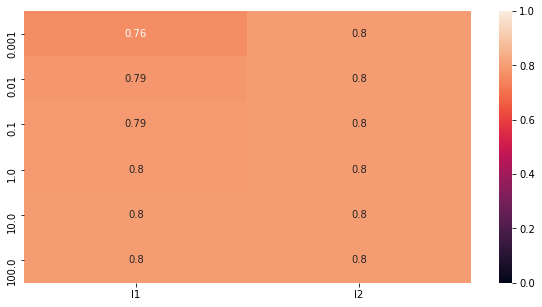

In [131]:
plt.figure(figsize=(10,5))
sns.heatmap(scores,vmin=0,vmax=1,annot=True)

In [145]:
from sklearn.metrics import f1_score, make_scorer

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=False,
                   scoring=make_scorer(f1_score,greater_is_better=True,average='macro'))

grid.fit(X_train, y_train)
print("Parameter grid:\n{}\nBest parameters:\n{}".format(param_grid,grid.best_params_))

Parameter grid:
[{'solver': ['liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}]
Best parameters:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [146]:
print("Best cross-validation f1 score: {:.2f}\nTest set f1 score: {:.2f}".format(grid.best_score_,grid.score(X_test, y_test)))

Best cross-validation f1 score: 0.72
Test set f1 score: 0.75


In [143]:
grid.scorer_

make_scorer(f1_score, average=micro)

The companies' target can be the decrease in share of predictions that falsely classify customers as being churned. With this basic model we may want to target higher Precision score, meaning that we want to decrease the share of false positive predictions for the positive class (Churn=Yes).

If we develop the new service for customers retention and our model systematically misclassifies clients who stay as being churned, we may not see the real result of our intervention due to model weakness.

In [147]:
from sklearn.metrics import classification_report

y_pred = grid.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1539
           1       0.68      0.57      0.62       574

    accuracy                           0.81      2113
   macro avg       0.76      0.73      0.75      2113
weighted avg       0.80      0.81      0.80      2113



# HomeWork 1

**Deadline: beginning of the next seminar for your group 191, 192 or 193 respectively. Overdue submissions are not allowed!**

**Work in groups:** yes, up to 3 people.

**File format:** IPython Notebook (ipynb) with supplemental data (if present).

**File name:** LastName(S)_Group.ipynb

**Caution!** Please send me the files from your HSE mailbox, otherwise they could be lost and hence not accounted.

**Spoiler!** Occasional match in datasets will be treated as occasional until the content of the notebooks doesn't match.  

**The task** (the main goal is to practice with BASIC ML application steps):

1. Use your dataset **OR** continue to work with the Customer Churning dataset.
2. State the problem you want to solve using ML algorithms. Is it classification or regression problem?
3. Provide basic EDA (summary statistics, number of missing values, scatterplots, corrmat, etc.).
4. Select features for your model. Argue.
5. Do Feature Engineering (missing data imputation, feature scaling, handle categorical features, take logs, etc.). Provide couple of sentences why it is needed for your analysis.
6. Select two algorithms you want to compare on your dataset.
7. Build models, Cross-Validate, Select model based on scoring metric **OR** use Grid Search to model evaluation and selection.


*Complement your code with comments!*